In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('region_04.csv')
df1 = pd.read_csv('region_04.csv')
# Calculate the total number of missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")
print(df.shape)


Total missing values: 68262
(847, 135)


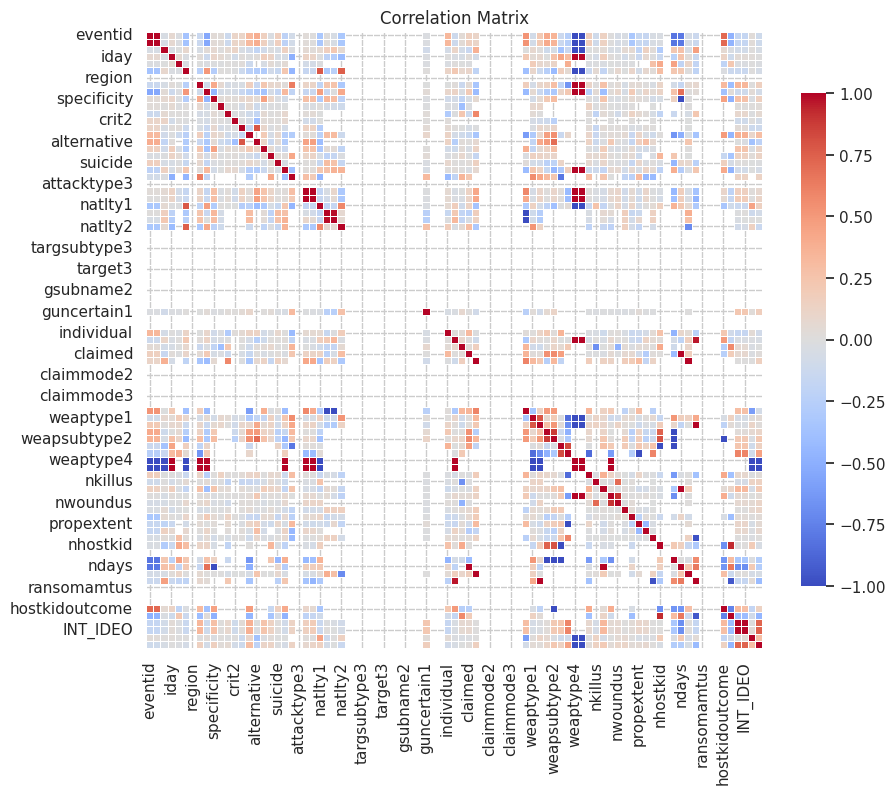

In [115]:
n_df1 = df1.select_dtypes(include=['number'])
correlation_matrix = n_df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, square=True)
plt.title('Correlation Matrix')
plt.show()

In [54]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
c = missing_percentage[missing_percentage > 60].index
print("Columns with more than 60% of the missing values:", c)

Columns with more than 60% of the missing values: Index(['approxdate', 'resolution', 'location', 'summary', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt',
       'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3',
       'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt',
       'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt',
       'weapsubtype4', 'weapsubtype4_txt', 'nkillus', 'nkillter', 'nwoundus',
 

In [55]:
# Dropping columns with more than 60% of the missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
columns_with_nulls = missing_percentage[missing_percentage > 0]
print(columns_with_nulls)
columns_to_drop = missing_percentage[missing_percentage > 60].index
df.drop(columns=columns_to_drop, inplace=True)

approxdate    99.763872
resolution    99.055490
latitude       0.944510
longitude      0.944510
location      84.415584
                ...    
addnotes      89.020071
scite1        70.011806
scite2        75.678867
scite3        83.943329
related       84.061393
Length: 99, dtype: float64


In [56]:
# Checking for duplicated values
dup = df.duplicated().sum()
print(dup)

0


In [7]:
# Rechecking for missing data
df.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
extended,0
country,0
country_txt,0
region,0
region_txt,0
provstate,0


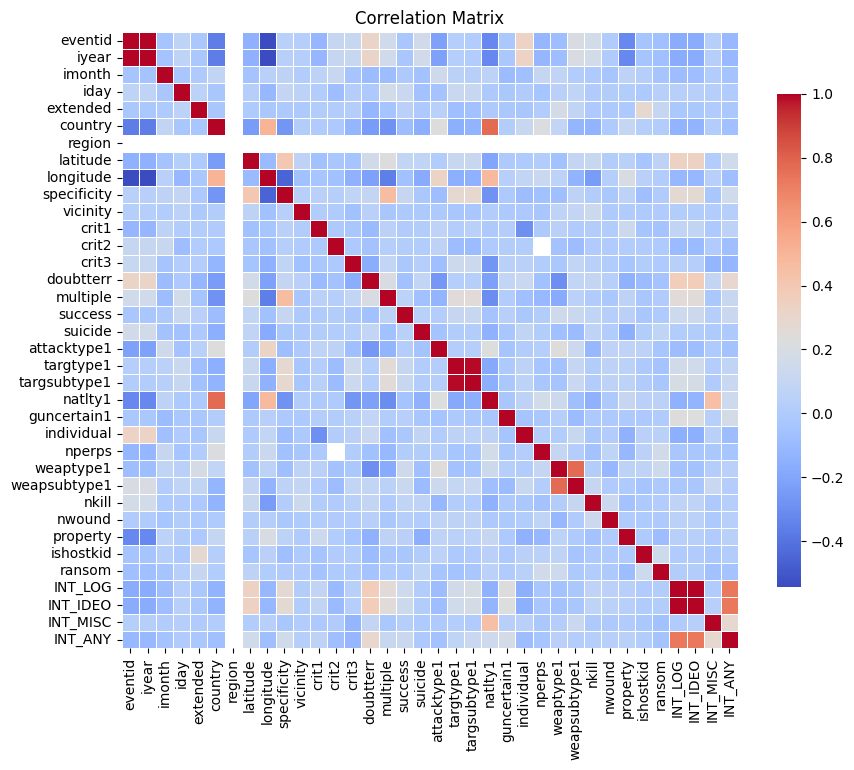

In [48]:
# Correlation matrix
n_df = df.select_dtypes(include=['number'])
correlation_matrix = n_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, square=True)
plt.title('Correlation Matrix')
plt.show()

In [51]:
# Checking for negative values
neg_val = (n_df < 0).sum()
print(neg_val)

eventid           0
iyear             0
imonth            0
iday              0
extended          0
country           0
region            0
latitude          0
longitude         0
specificity       0
vicinity          0
crit1             0
crit2             0
crit3             0
doubtterr       229
multiple          0
success           0
suicide           0
attacktype1       0
targtype1         0
targsubtype1      0
natlty1           0
guncertain1       0
individual        0
nperps           82
weaptype1         0
weapsubtype1      0
nkill             0
nwound            0
property         39
ishostkid         1
ransom            1
INT_LOG         580
INT_IDEO        581
INT_MISC          8
INT_ANY         478
dtype: int64


In [ ]:
df.drop(columns = ['INT_LOG','INTIDEO','INT_MISC','INT_ANY','doubtterr','nperps','property','ishostkid','ransom'])

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

num_numerical_cols = len(numerical_cols)
num_categorical_cols = len(categorical_cols)

print(numerical_cols)
print(categorical_cols)

print("Numerical Columns:")
print(numerical_df.head())

print("\nCategorical Columns:")
print(categorical_df.head())

print(f"\nTotal number of numerical columns: {num_numerical_cols}")
print(f"Total number of categorical columns: {num_categorical_cols}")

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'weaptype1', 'weapsubtype1', 'nkill', 'nwound', 'property',
       'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')
Index(['country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt',
       'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail', 'dbsource'],
      dtype='object')
Numerical Columns:
        eventid  iyear  imonth  iday  extended  country  region   latitude  \
0  197001000003   1970       1     0         0      101       4  33.580412   
1  197003310002   1970       3    31         1      101       4  33.580412   
2  19

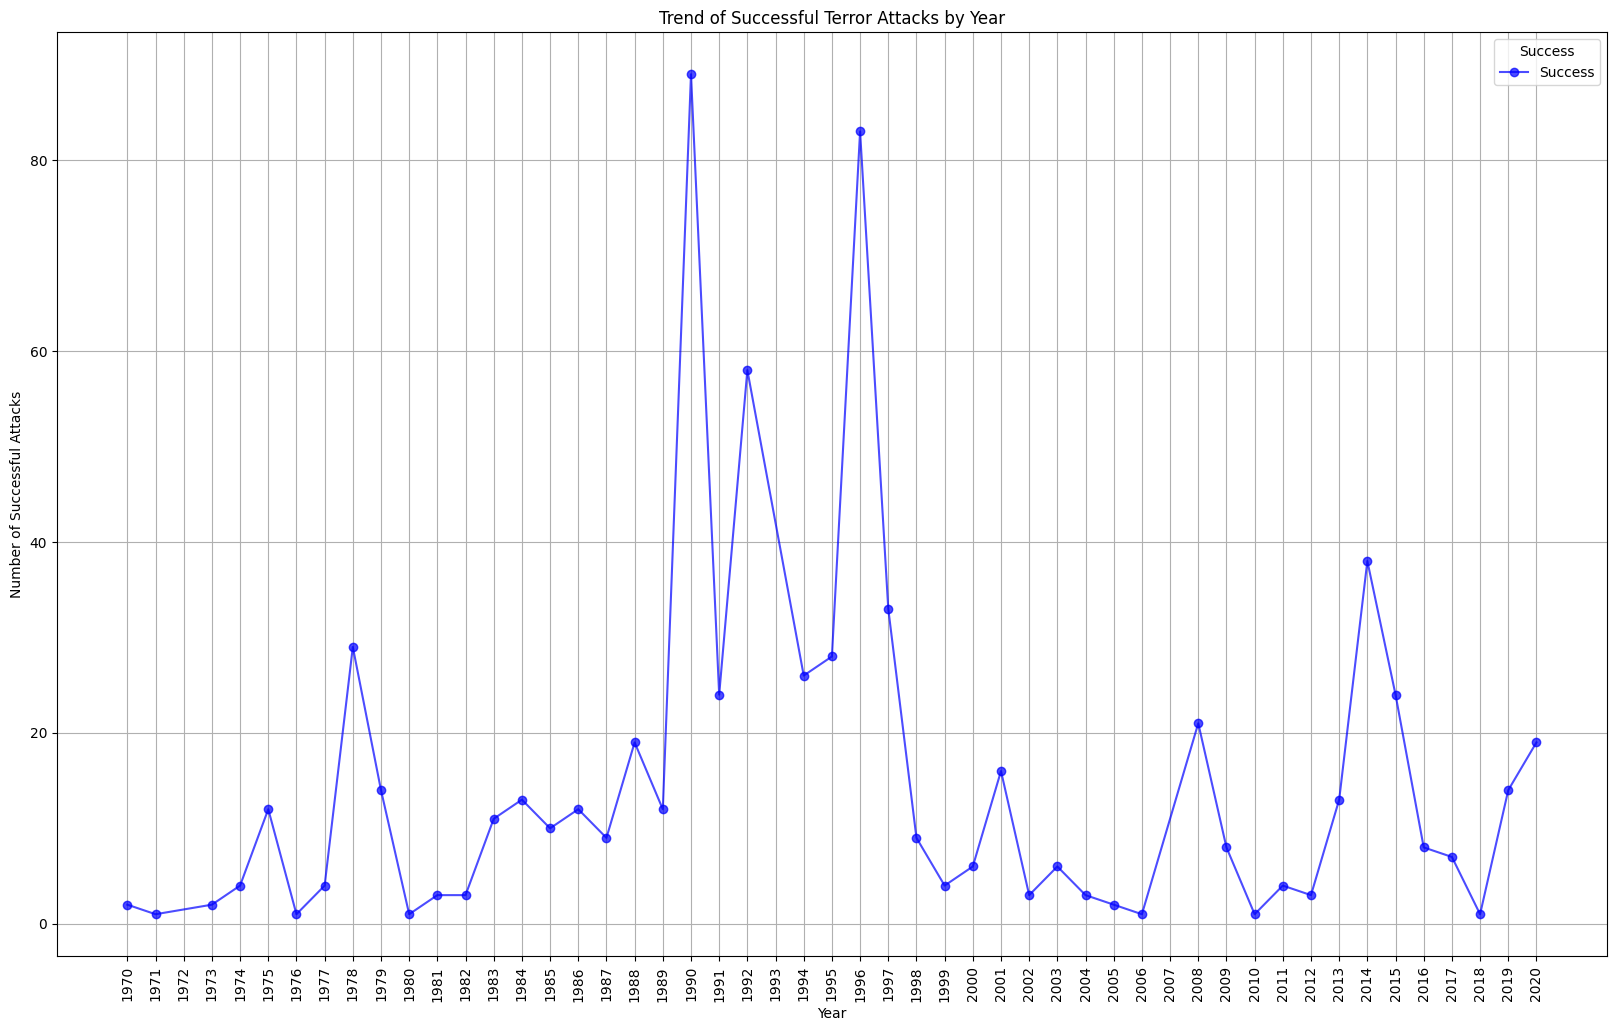

In [22]:
grouped_data = df.groupby(['iyear', 'success']).size().reset_index(name='count')

success_data = grouped_data[grouped_data['success'] == 1]

plt.figure(figsize=(20, 12))
plt.plot(success_data['iyear'], success_data['count'], label="Success", marker='o', color='b', alpha=0.7)
plt.title('Trend of Successful Terror Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Successful Attacks')
plt.xticks(range(min(df['iyear']), max(df['iyear']) + 1), rotation=90)
plt.legend(title="Success")
plt.grid(True)
plt.show()

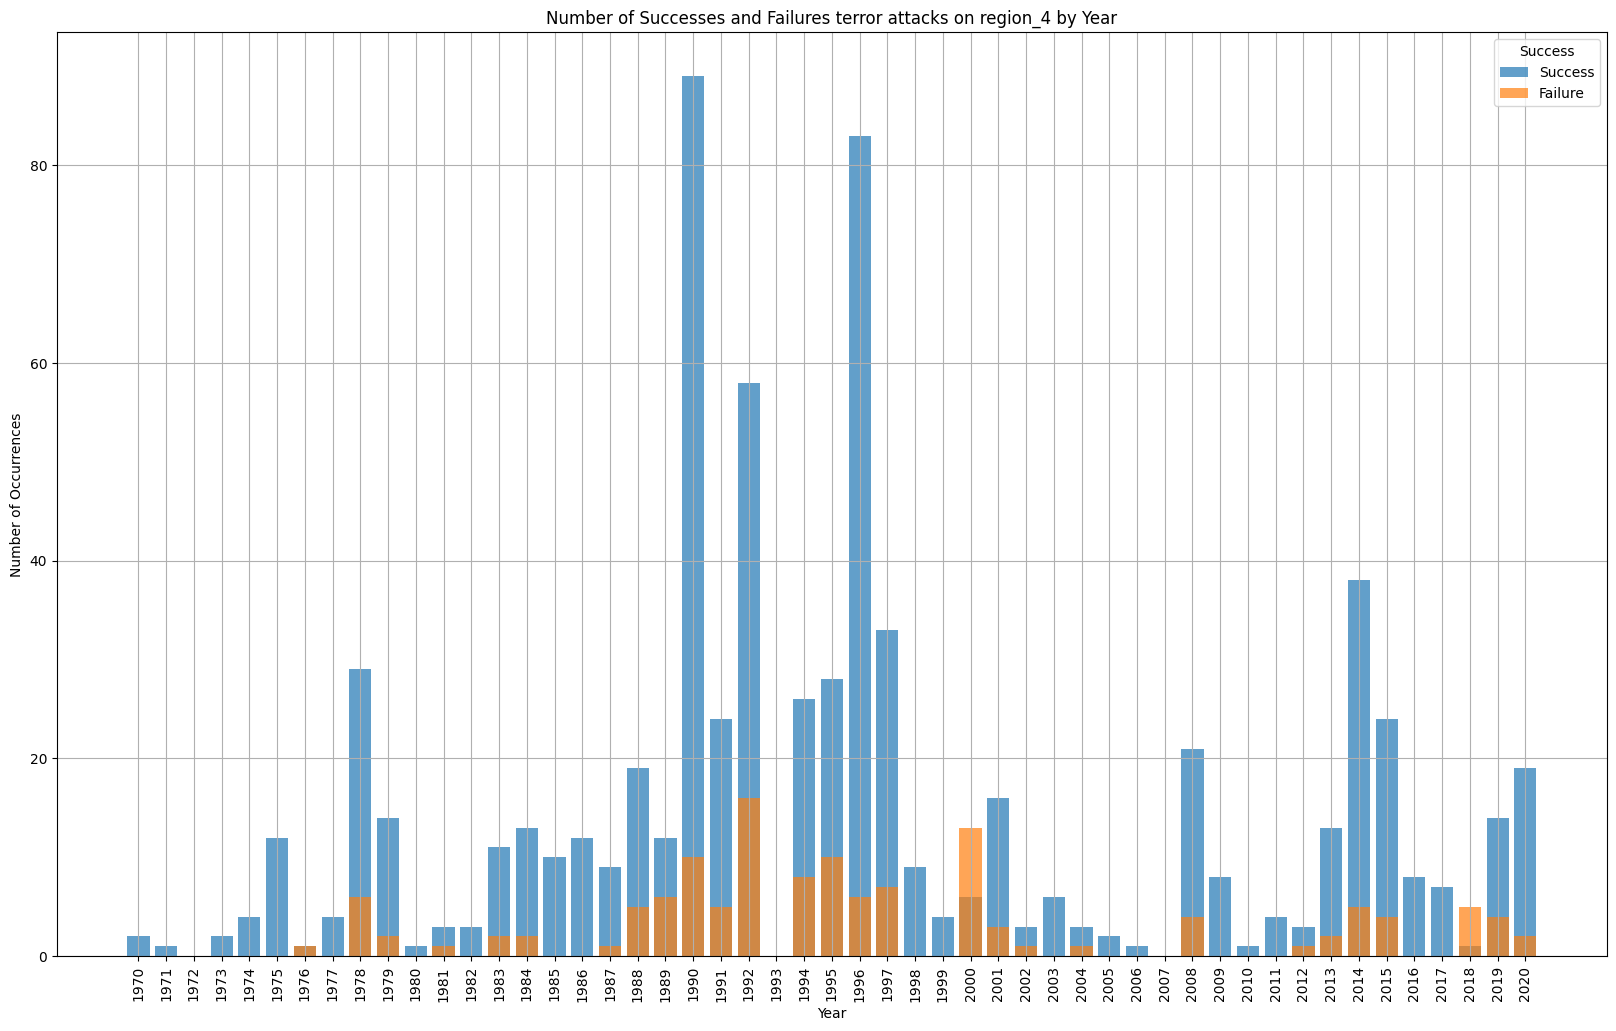

In [15]:
grouped_data = df.groupby(['iyear', 'success']).size().reset_index(name='count')

# Plotting the results
plt.figure(figsize=(20, 12))

# Create a bar plot for the grouped data
for success_value in grouped_data['success'].unique():
    success_data = grouped_data[grouped_data['success'] == success_value]
    label = "Success" if success_value == 1 else "Failure"
    plt.bar(success_data['iyear'], success_data['count'], label=label, alpha=0.7)

# Add labels and title
plt.title('Number of Successes and Failures terror attacks on region_4 by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.xticks(range(min(df['iyear']), max(df['iyear']) + 1), rotation=90)
plt.legend(title="Success")
plt.grid(True)
plt.show()

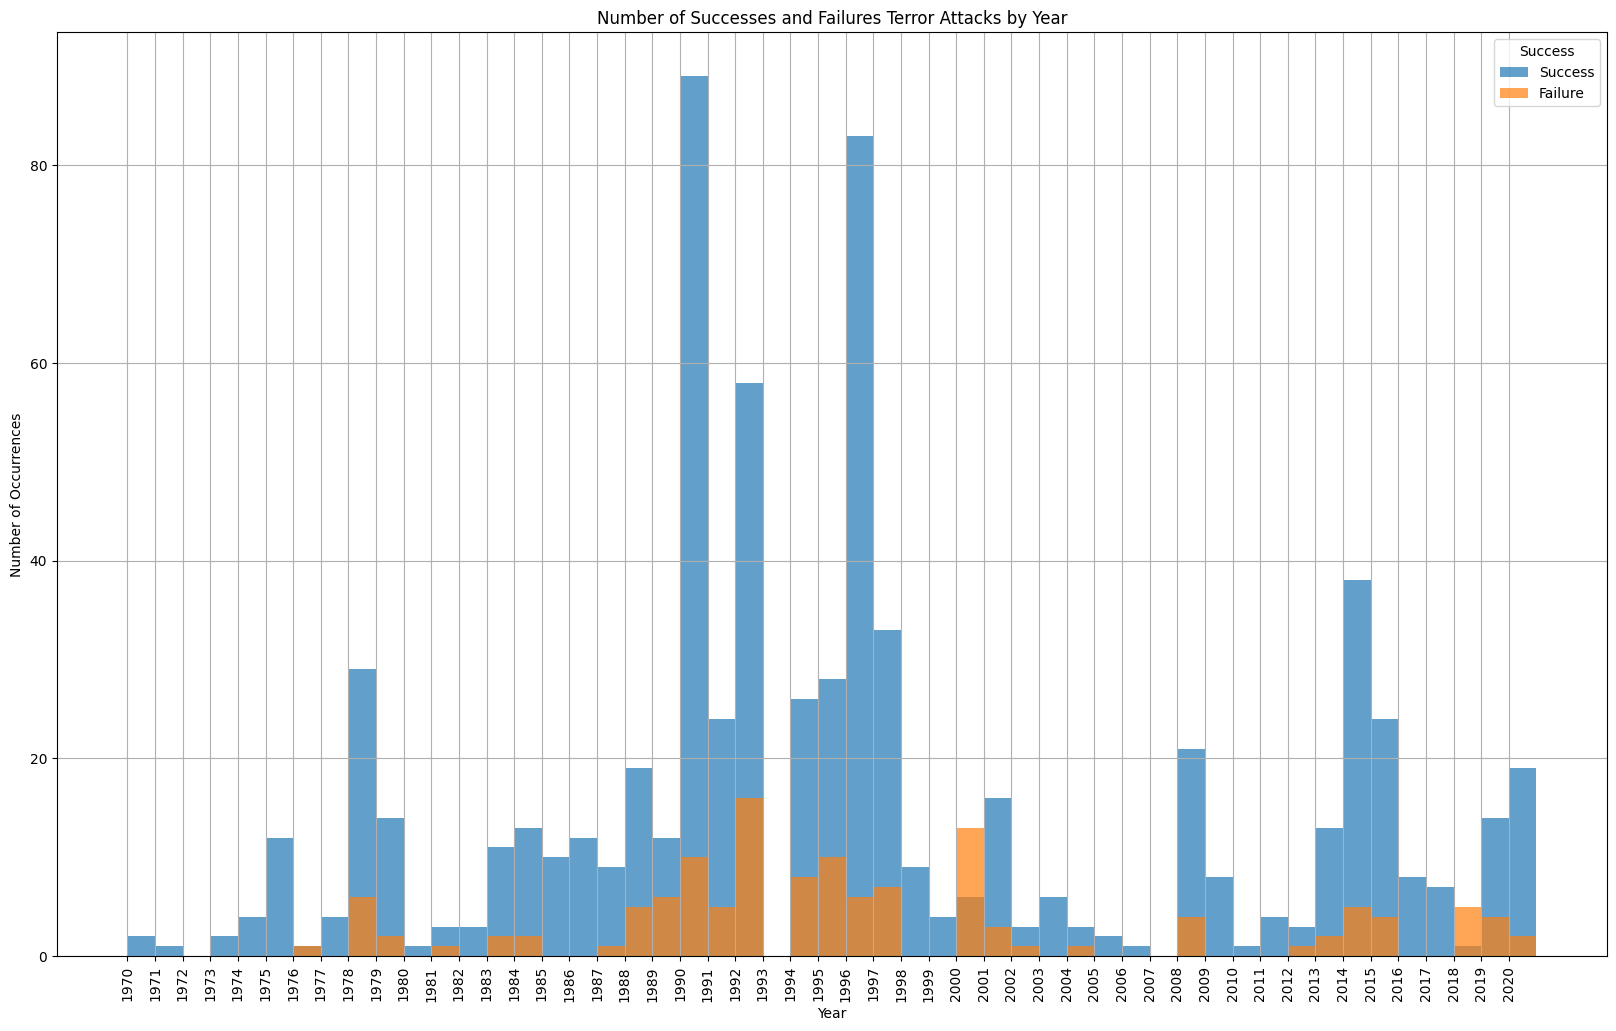

In [18]:
grouped_data = df.groupby(['iyear', 'success']).size().reset_index(name='count')

plt.figure(figsize=(20, 12))

for success_value in grouped_data['success'].unique():
    success_data = grouped_data[grouped_data['success'] == success_value]
    label = "Success" if success_value == 1 else "Failure"
    plt.hist(success_data['iyear'], weights=success_data['count'], bins=range(min(df['iyear']), max(df['iyear']) + 2), alpha=0.7, label=label)

plt.title('Number of Successes and Failures Terror Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.xticks(range(min(df['iyear']), max(df['iyear']) + 1), rotation=90)
plt.legend(title="Success")
plt.grid(True)
plt.show()

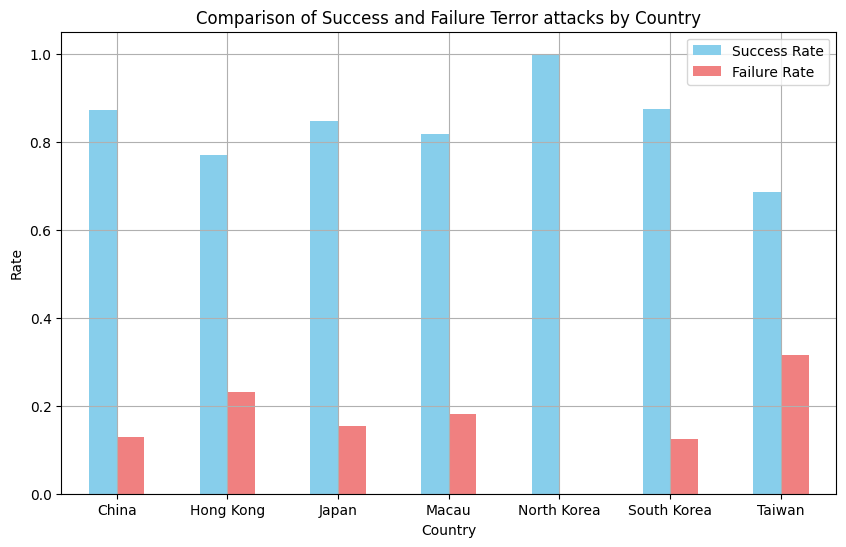

In [23]:
rates = df.groupby('country_txt')['success'].agg(['mean', 'size'])

rates['loss_rate'] = 1 - rates['mean']
rates[['mean', 'loss_rate']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Comparison of Success and Failure Terror attacks by Country')
plt.xlabel('Country')
plt.ylabel('Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(['Success Rate', 'Failure Rate'])
plt.show()

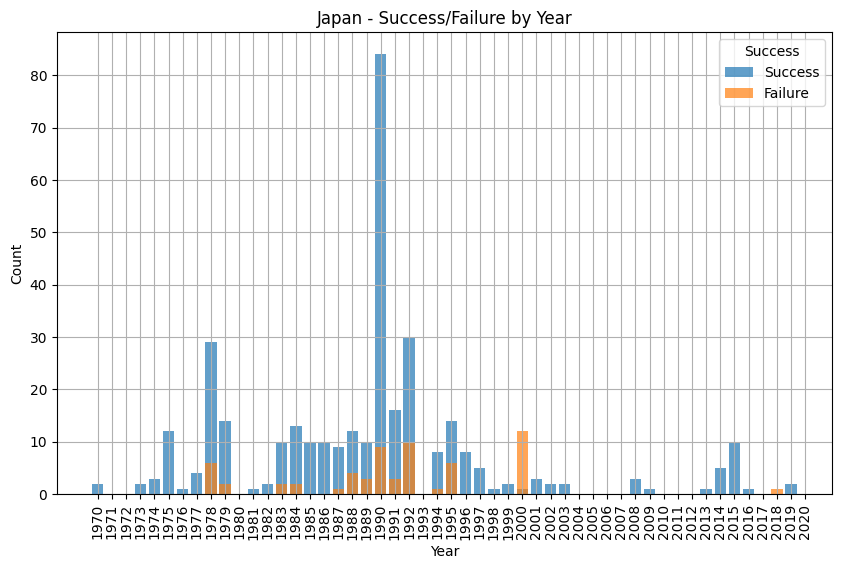

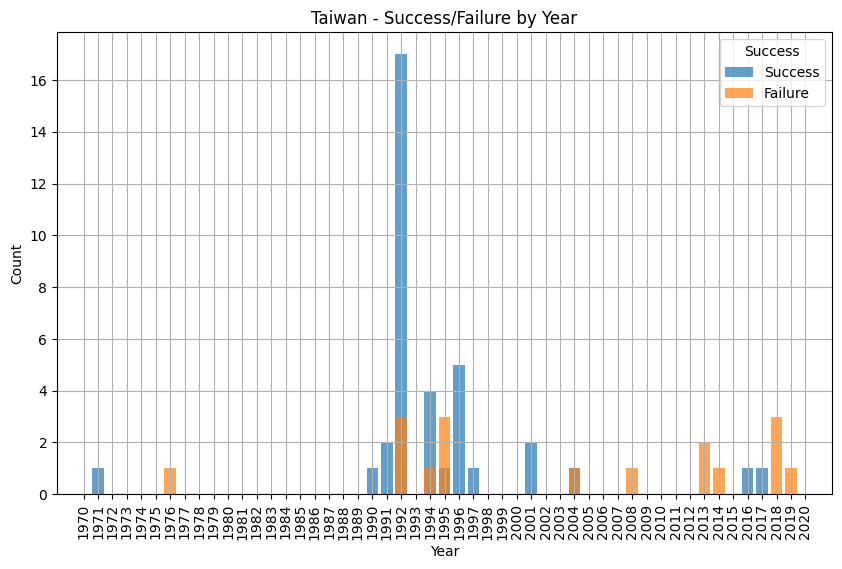

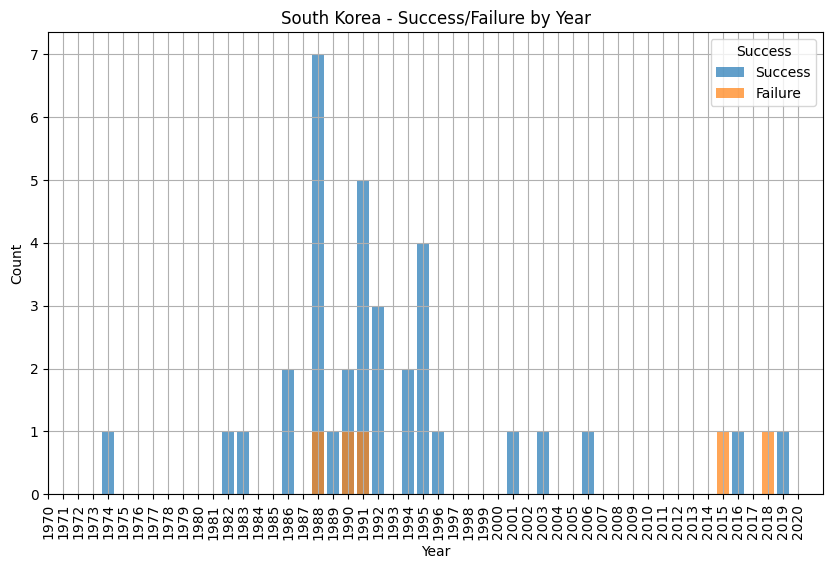

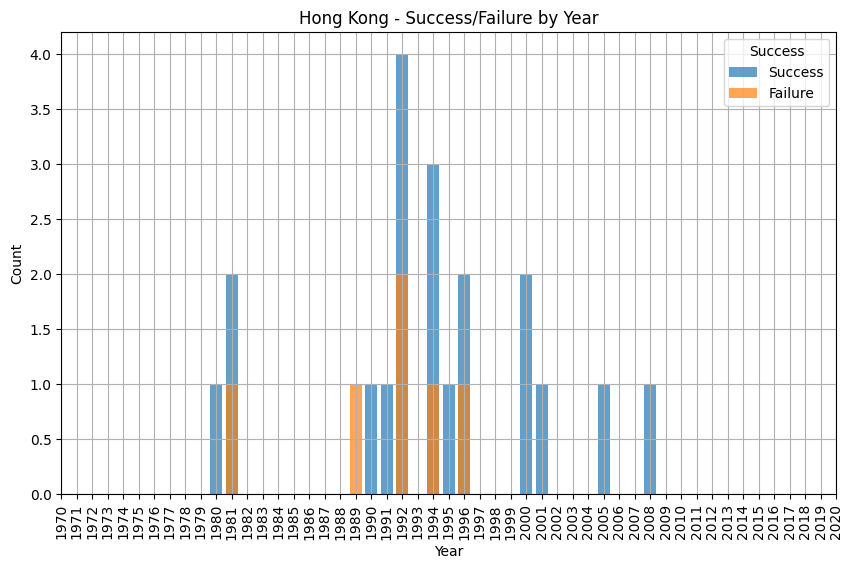

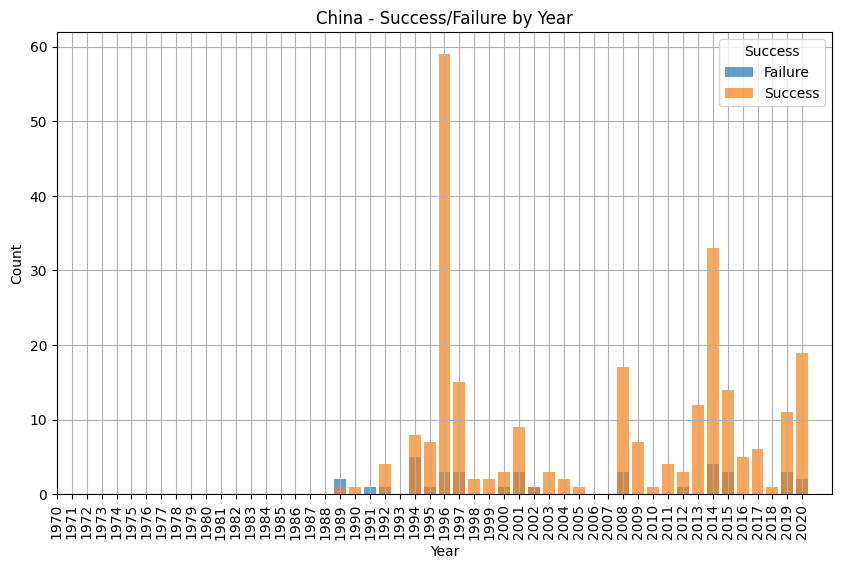

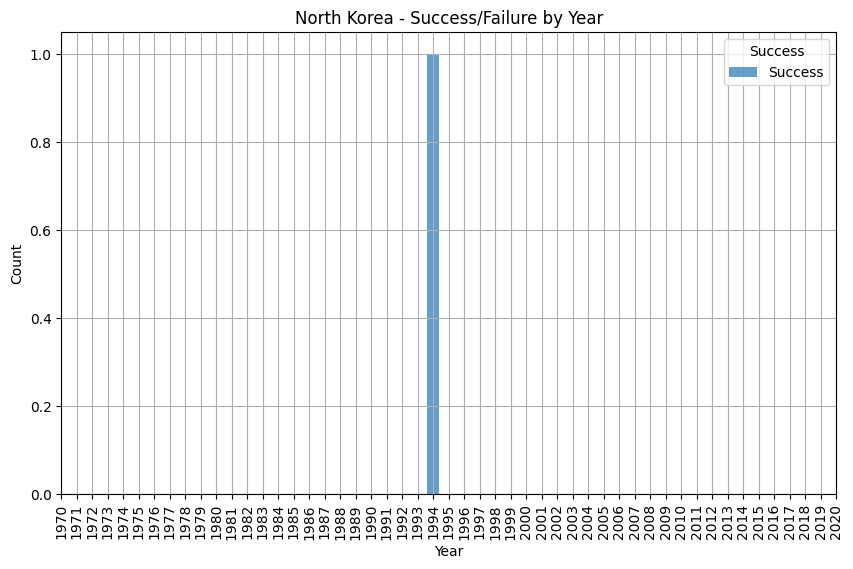

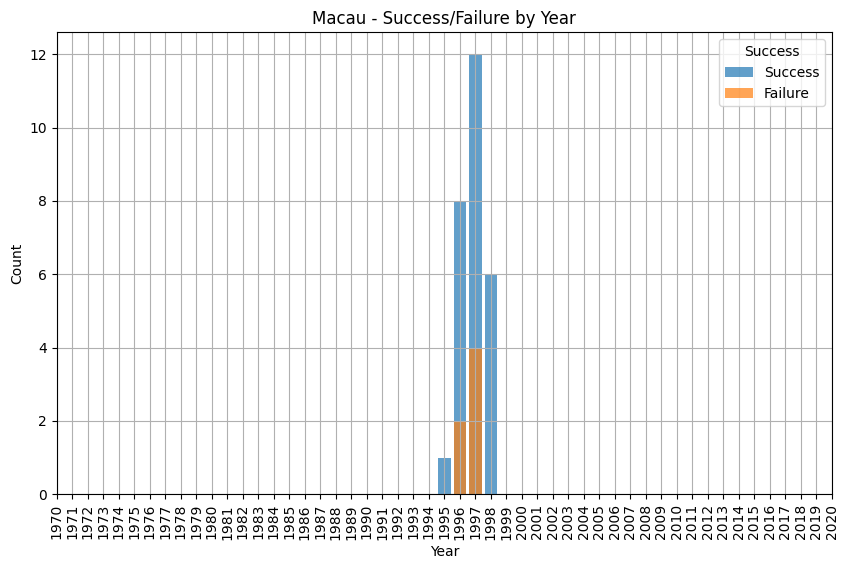

In [24]:
# Number of terror attacks occured in a country over the years
grouped_data = df.groupby(['country_txt', 'iyear', 'success']).size().reset_index(name='count')
countries = df['country_txt'].unique()

for country in countries:
    country_data = grouped_data[grouped_data['country_txt'] == country]
    plt.figure(figsize=(10, 6))

    for success_value in country_data['success'].unique():
        success_data = country_data[country_data['success'] == success_value]
        label = "Success" if success_value == 1 else "Failure"
        plt.bar(success_data['iyear'], success_data['count'], label=label, alpha=0.7)

    plt.title(f'{country} - Success/Failure by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(range(min(df['iyear']), max(df['iyear']) + 1),rotation=90)
    plt.legend(title="Success")
    plt.grid(True)
    plt.show()

In [38]:
# Choropleth map showing color gradients across countries based on the number of attacks
import plotly.express as px
country_attack_count = df.groupby('country_txt').size().reset_index(name='attack_count')

fig = px.choropleth(country_attack_count,
                    locations="country_txt",
                    locationmode="country names",
                    color="attack_count",
                    color_continuous_scale="Viridis",
                    title="Terror Attacks by Country")

fig.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="white",
        projection_type="natural earth",
    ),
)
fig.update_traces(hoverinfo='skip', text=None)
fig.show()

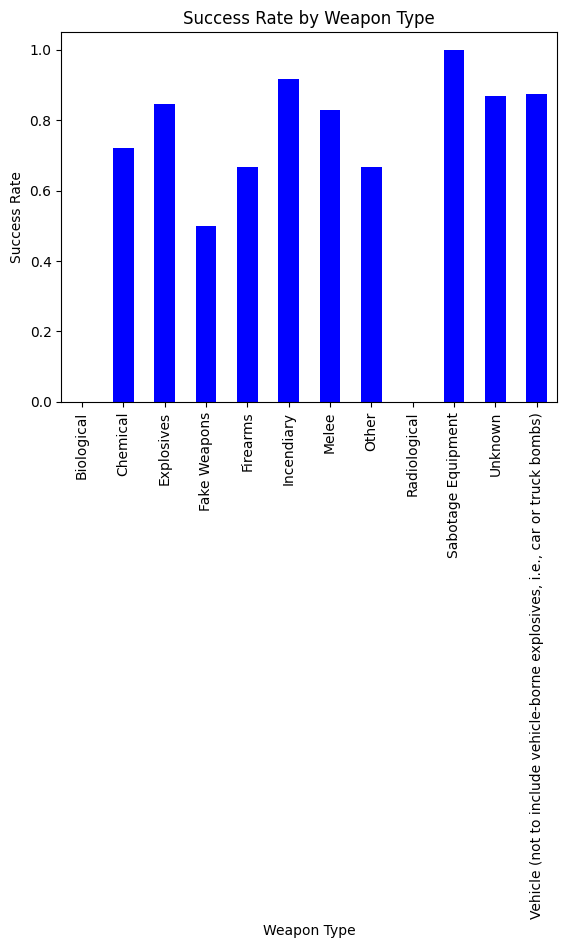

In [65]:
# Bar plot of the attack success rate by the type of weapon
df['success'] == 1

weapon_success_rate = df.groupby('weaptype1_txt')['success'].mean()

weapon_success_rate.plot(kind='bar', color='blue', title="Success Rate by Weapon Type")
plt.xlabel('Weapon Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.show()

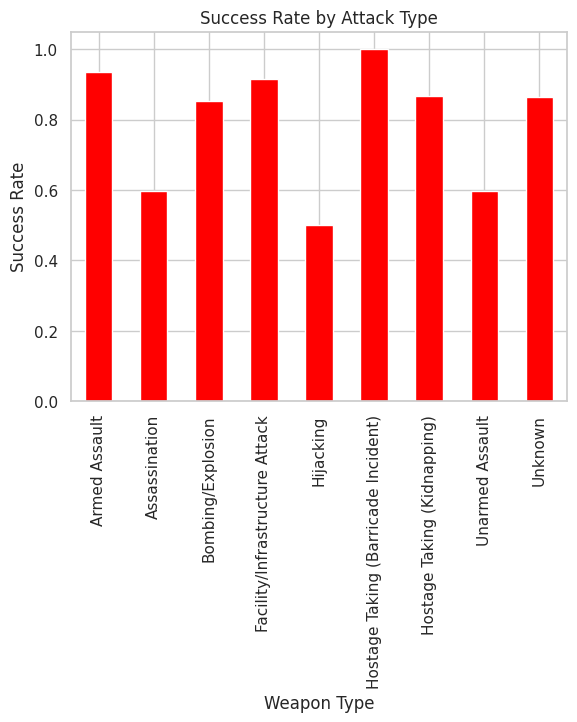

In [81]:
df['success'] == 1

weapon_success_rate = df.groupby('attacktype1_txt')['success'].mean()

weapon_success_rate.plot(kind='bar', color='red', title="Success Rate by Attack Type")
plt.xlabel('Weapon Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.show()

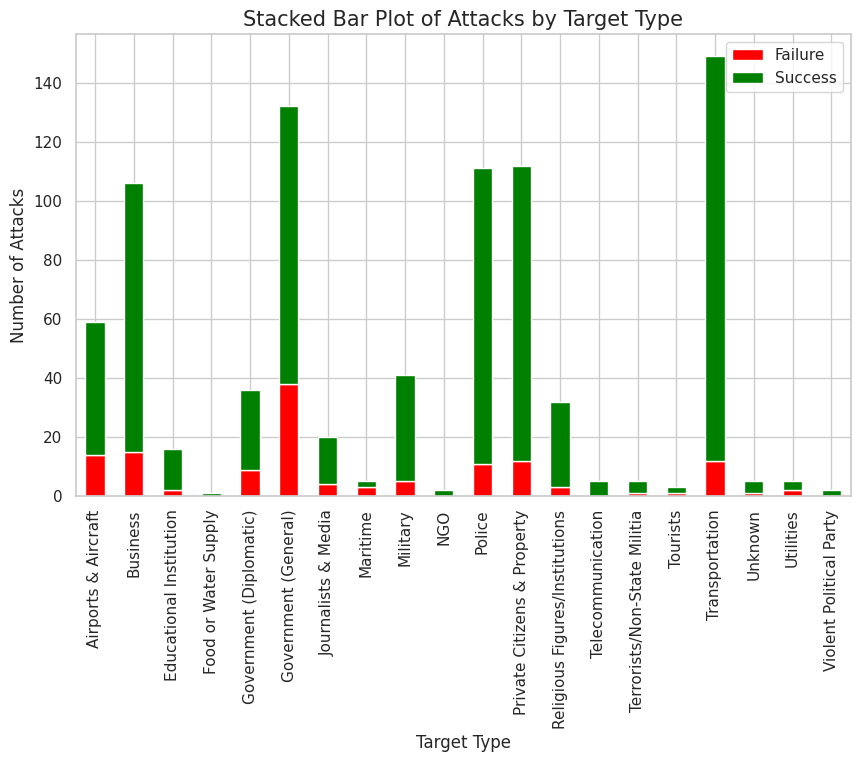

In [86]:
# Stacked bar
success_counts = df.groupby(['targtype1_txt', 'success']).size().unstack()

success_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title("Stacked Bar Plot of Attacks by Target Type", fontsize=15)
plt.xlabel("Target Type", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.xticks(rotation=90)
plt.legend(['Failure', 'Success'])
plt.show()

In [79]:
# Treemap representation of Attacks on Targets
fig = px.treemap(df, path=['targtype1_txt'], title="Treemap of Attacks by Target Type")
fig.show()

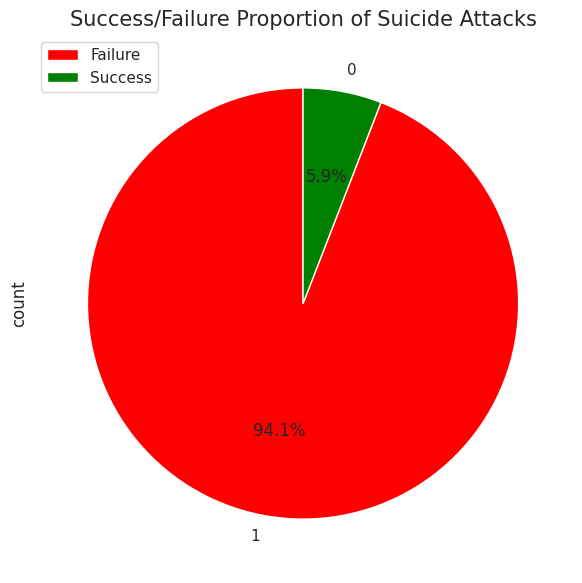

In [113]:
# Pie chart to represent the proportion of successful to failed suicide attacks
suicide_attacks = df[df['suicide'] == 1]
success_counts = suicide_attacks['success'].value_counts()

plt.figure(figsize=(7, 7))
success_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], startangle=90, legend=True)
plt.title("Success/Failure Proportion of Suicide Attacks", fontsize=15)
plt.legend(labels=['Failure', 'Success'], loc='upper left')
plt.show()